<a href="https://colab.research.google.com/github/romeofx/PortfolioProjects/blob/main/Shopping_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import numpy as np
import pandas  as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
import csv

In [3]:
df = pd.read_csv('/content/Mall_Customers.csv')

In [5]:
df


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# Univariate Analysis

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

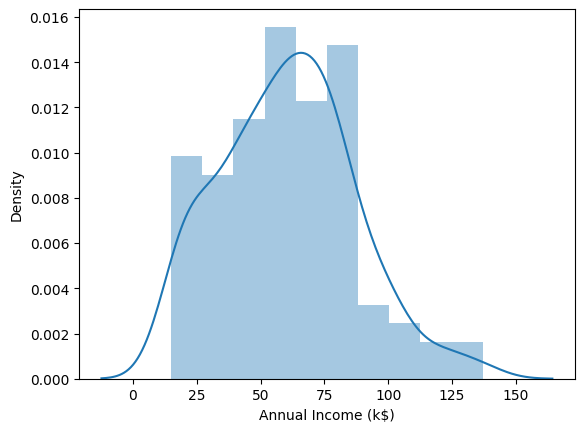

In [56]:
sns.distplot(df['Annual Income (k$)'])

In [8]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

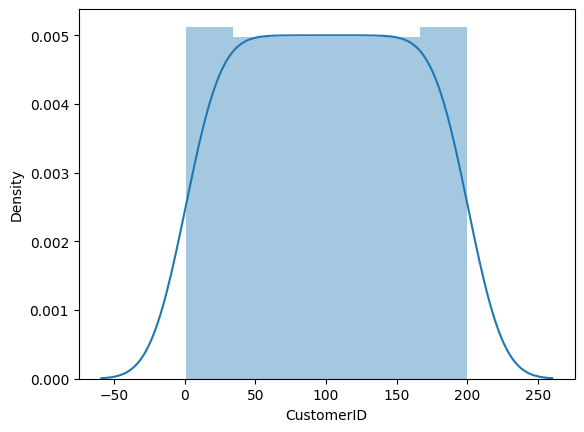

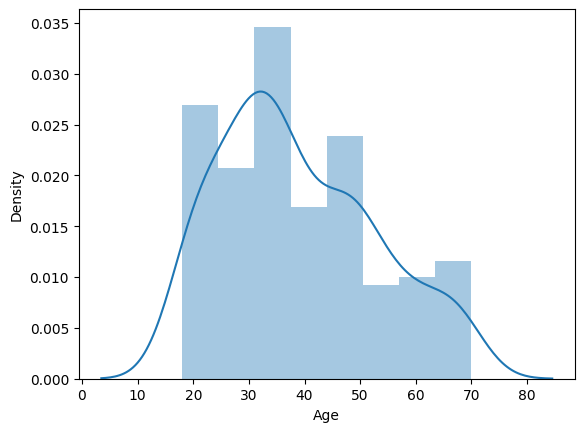

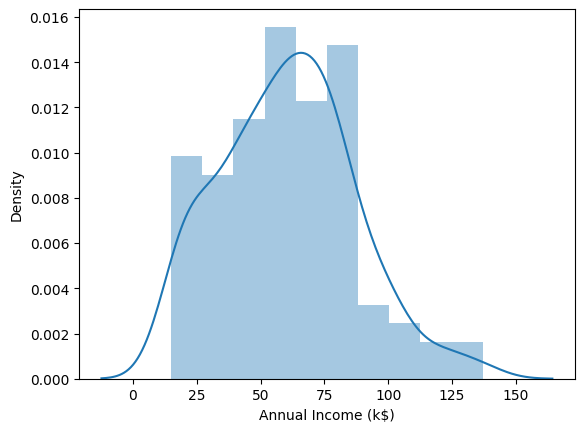

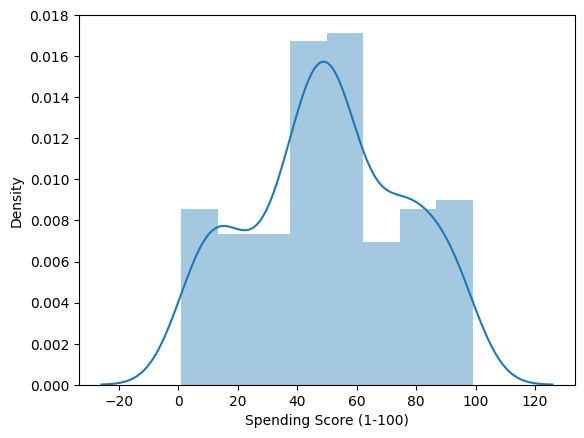

In [9]:
columns = ['CustomerID',  'Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
  plt.figure()
  sns.distplot(df[i])

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

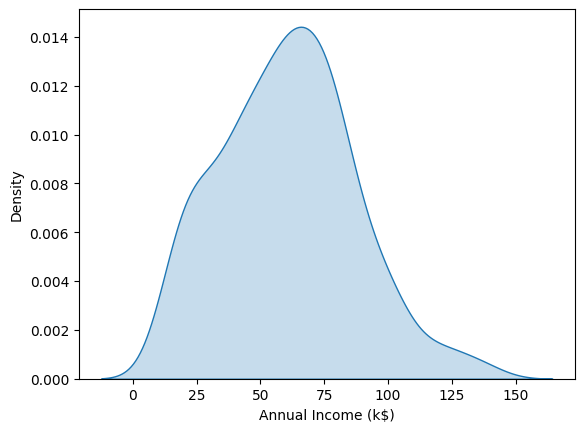

In [10]:
sns.kdeplot(df['Annual Income (k$)'],shade= True)

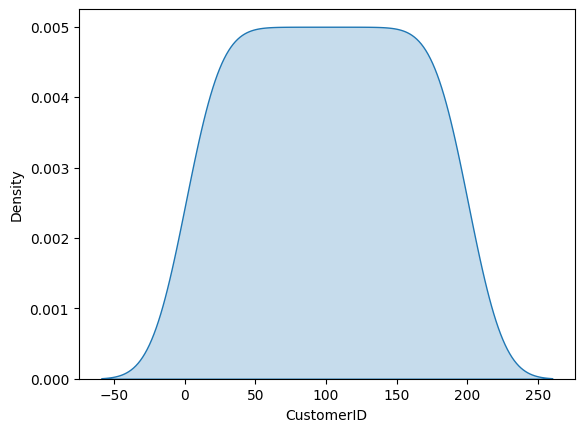

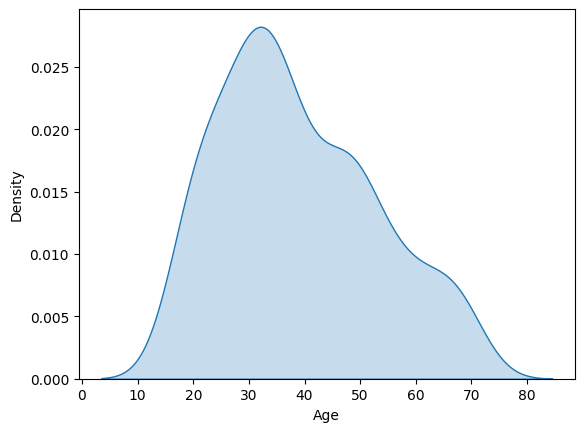

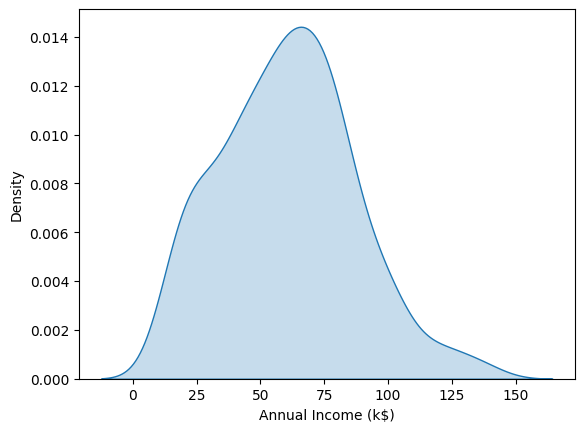

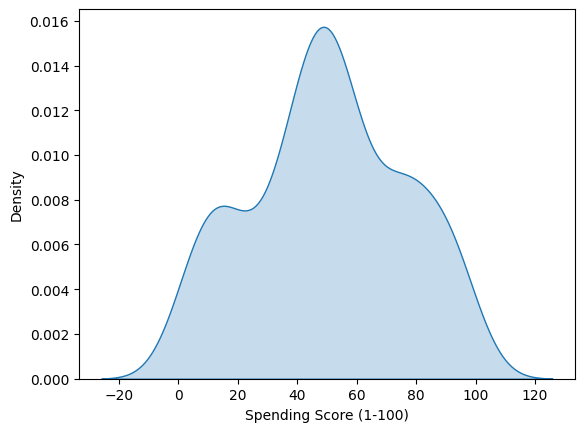

In [11]:
columns = ['CustomerID',  'Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
  plt.figure()
  sns.kdeplot(df[i],shade =True,)

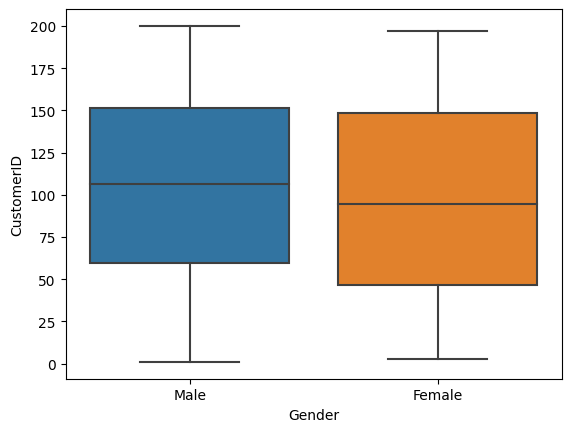

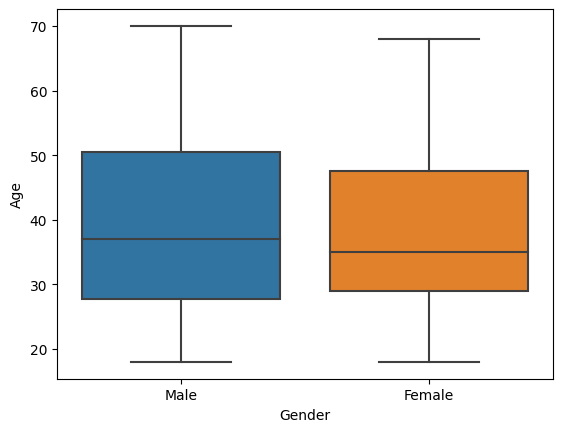

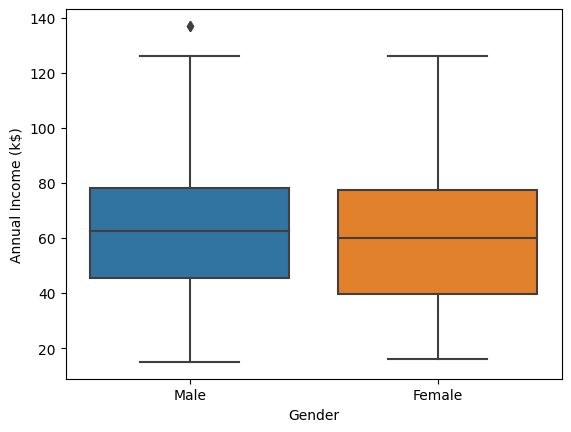

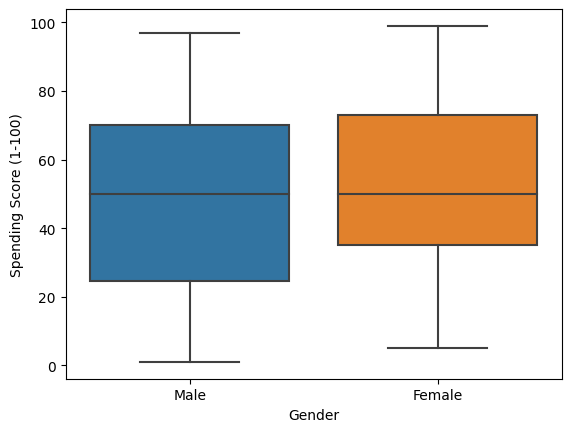

In [12]:
columns = ['CustomerID',  'Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
  plt.figure()
  sns.boxplot(data=df,x='Gender',y=df[i])

In [13]:
df['Gender'].value_counts(normalize = True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

# **Bivariate Analysis**


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

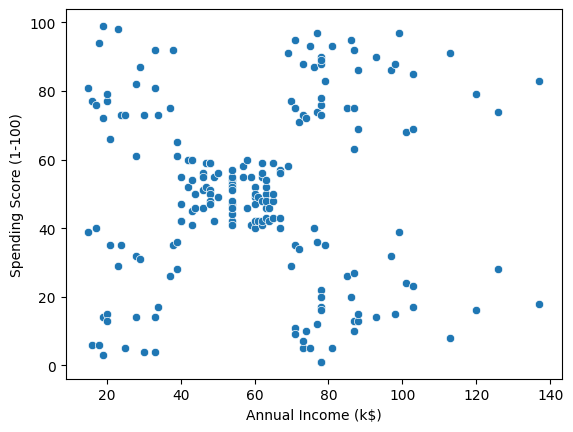

In [14]:
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)')

In [15]:

df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

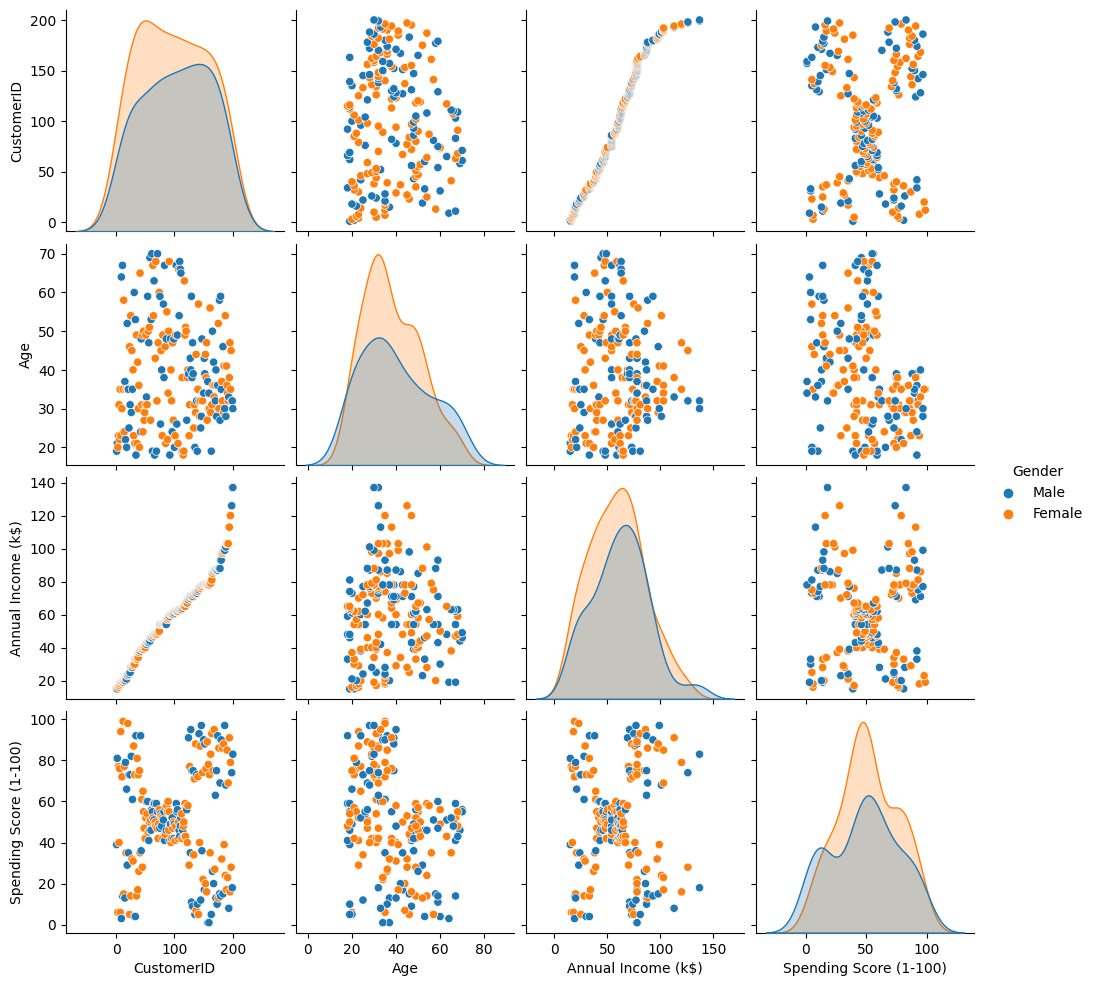

In [16]:
#df=df.drop('CustomerID',axis=1)
sns.pairplot(df,hue='Gender')

In [17]:
df.groupby(['Gender'])['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [18]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<Axes: >

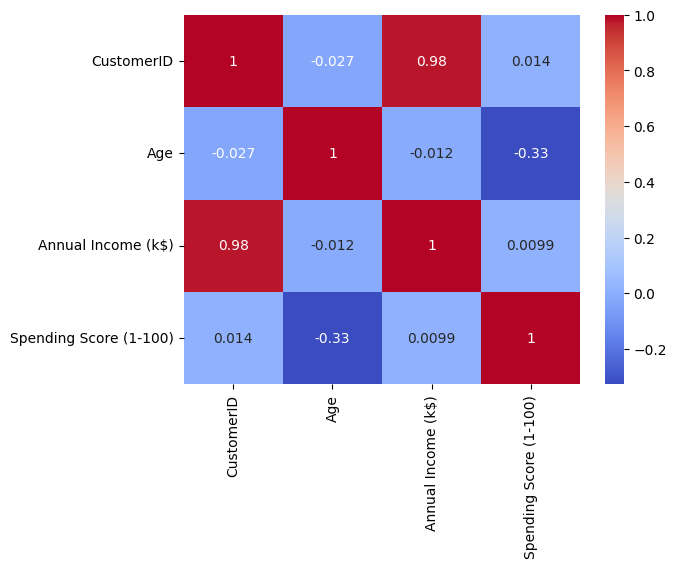

In [19]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

## **Clustering** - **Univariate**, **Bivariate**, **Multivariate**

In [20]:
clustering1 = KMeans(n_clusters=6)

In [21]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=6)

In [22]:
clustering1.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4,
       4, 4], dtype=int32)

In [23]:
df['income cluster'] = clustering1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),income cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


In [24]:
df['income cluster'].value_counts

<bound method IndexOpsMixin.value_counts of 0      2
1      2
2      2
3      2
4      2
      ..
195    4
196    4
197    4
198    4
199    4
Name: income cluster, Length: 200, dtype: int32>

In [25]:
df['income cluster'].value_counts()
clustering1.inertia_

5050.9047619047615

In [26]:
intertia_scores = []
for i in range(1,11):
  Kmeans = KMeans(n_clusters=i)
  Kmeans.fit(df[['Annual Income (k$)']])
  intertia_scores.append(Kmeans.inertia_)


In [27]:
intertia_scores

[137277.28000000006,
 48660.888888888876,
 23517.33093093093,
 13278.112713472483,
 8481.49619047619,
 5081.484660267268,
 3941.4163614163635,
 2921.5666666666666,
 2213.6207792207797,
 1805.822510822512]

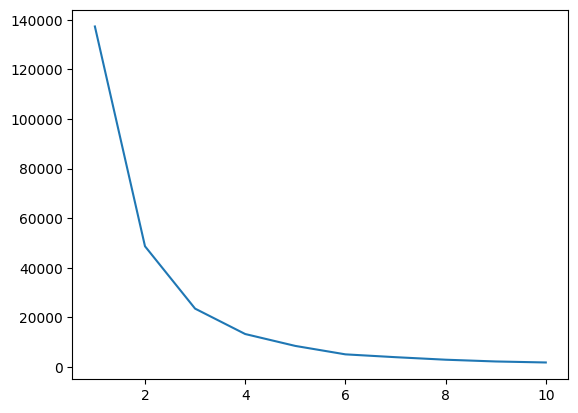

In [28]:
plt.plot(range(1,11),intertia_scores)

In [29]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'income cluster'],
      dtype='object')

In [30]:
df.groupby('income cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
income cluster,,,
0,43.000000,42.238095,50.666667
1,38.214286,93.000000,50.928571
2,34.906250,22.000000,49.656250
3,41.604167,60.083333,49.041667
4,36.500000,124.000000,49.625000
5,35.428571,75.095238,51.095238


## **Bivariate clustering**

In [31]:
clustering2= KMeans()

In [32]:
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
clustering2.labels_
df['Spending and income cluster']=clustering2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),income cluster,Spending and income cluster
0,1,Male,19,15,39,2,3
1,2,Male,21,15,81,2,0
2,3,Female,20,16,6,2,3
3,4,Female,23,16,77,2,0
4,5,Female,31,17,40,2,3


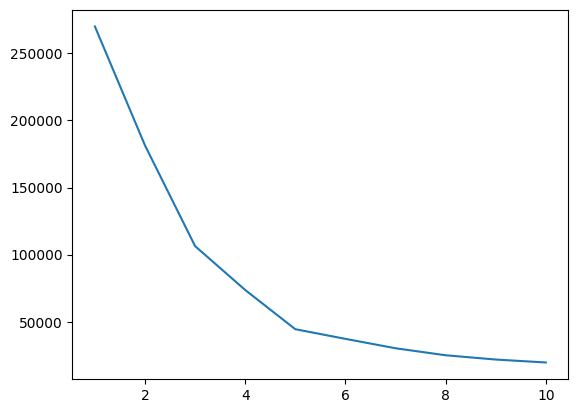

In [33]:
intertia_scores2 = []
for i in range(1,11):
  Kmeans2 = KMeans(n_clusters=i)
  Kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
  intertia_scores2.append(Kmeans2.inertia_)
plt.plot(range(1,11),intertia_scores2)

In [34]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns=['x','y']

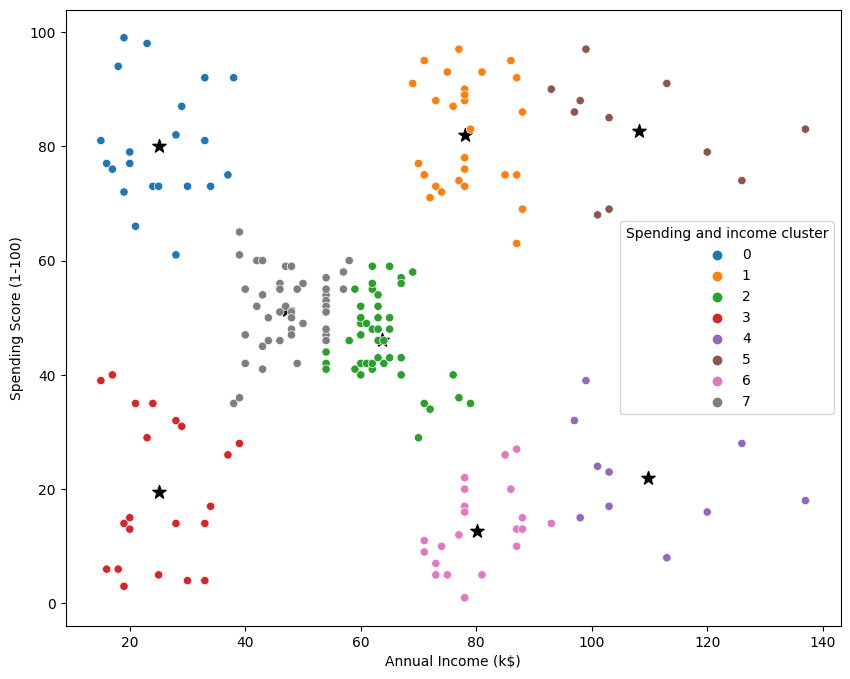

In [45]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df, x ='Annual Income (k$)', y ='Spending Score (1-100)',hue ='Spending and income cluster',palette='tab10')
plt.savefig('cluster.png')

In [36]:
pd.crosstab(df['Spending and income cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and income cluster,,
0,0.571429,0.428571
1,0.535714,0.464286
2,0.604651,0.395349
3,0.619048,0.380952
4,0.700000,0.300000
5,0.545455,0.454545
6,0.318182,0.681818
7,0.590909,0.409091


In [37]:
df.groupby(['Spending and income cluster']).mean()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),income cluster
Spending and income cluster,,,,,
0,22.000000,25.333333,25.095238,80.047619,1.523810
1,151.000000,32.785714,78.035714,81.892857,4.000000
2,109.395349,41.674419,63.720930,46.162791,3.325581
3,21.190476,44.142857,25.142857,19.523810,1.523810
4,190.000000,41.000000,109.700000,22.000000,2.200000
5,190.000000,32.454545,108.181818,82.727273,2.090909
6,155.454545,41.000000,80.181818,12.681818,3.545455
7,64.795455,43.909091,47.295455,51.409091,0.818182


# Multivariate Clustering

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
dff=pd.get_dummies(df,drop_first=True)
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),income cluster,Spending and income cluster,Gender_Male
0,1,19,15,39,2,3,1
1,2,21,15,81,2,0,1
2,3,20,16,6,2,3,0
3,4,23,16,77,2,0,0
4,5,31,17,40,2,3,0


In [40]:
#dff.columns
dff=dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]


In [41]:
dff

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


In [44]:
df.to_csv('cluster.csv')